In [2]:
import numpy as np
import pandas as pd
# 전체적인 환경설정 용도
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font', family = font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 훈련용과 테스트용 데이터를 나누어준다.
from sklearn.model_selection import train_test_split

#pip install mglearn
import mglearn

from sklearn.neighbors import KNeighborsClassifier

# 선형 회귀
    1) 단일 선형회귀
    2) 다중 선형회귀


w[0]: 0.393906  b: -0.031804


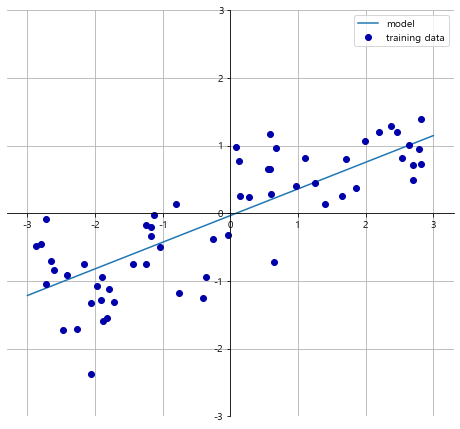

In [4]:
mglearn.plots.plot_linear_regression_wave()

In [11]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples = 60)

# 데스트데이터와 훈련데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

#데이터 훈련시키기
lr = LinearRegression().fit(X_train, y_train)

In [14]:
# 기울기와 절편
print(lr.coef_, lr.intercept_) 

# 성능측정
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

[0.39390555] -0.031804343026759746
0.6700890315075756
0.65933685968637


In [ ]:
# 주제 : 전기 생산량과 소비량
# 귀무가설 : 전기 생산량과 소비량은 상관관계가 없다.
# 대립가설 : 전기 생산량과 소비량은 상관관계가 있다.

In [16]:
from scipy import stats

# 월별 전기 사용량(백만kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]


result = stats.linregress(X,y)
result
# pvalue 로 인해 대립가설 선택(상관관계가 있다, 선형회귀 분석을 할 가치가 있다.)

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728)

In [17]:
# 데이터는 2차원으로 정답은 1차원으로 전달해주어야함.
num = np.array(X)
# 크기는 알아서, 하지만 2차원 배열로 변경
num = num.reshape(-1,1)
lr = LinearRegression().fit(num,y)

In [19]:
lr.coef_, lr.intercept_

(array([0.49560324]), 0.919581428068942)

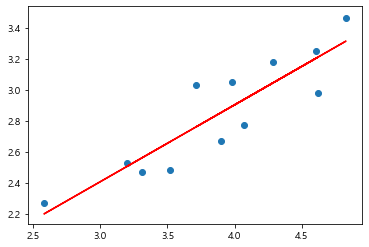

In [24]:
plt.scatter(X,y)
plt.plot(np.array(X), lr.coef_*np.array(X) + lr.intercept_, c = 'red')

In [27]:
# 생산량이 5일때 사용량은 얼마일까?
5 * lr.coef_ + lr.intercept_

array([3.39759761])

In [31]:
# 보스톤 주택가격
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [40]:
# 보스턴 데이터 크기 늘리기
X,y = mglearn.datasets.load_extended_boston()
X.shape
# 데스트데이터와 훈련데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

#데이터 훈련시키기
lr = LinearRegression().fit(X_train, y_train)

In [42]:
print('훈련점수 : ', lr.score(X_train, y_train))
print('테스트 점수 : ', lr.score(X_test, y_test))

훈련점수 :  0.9448313975211593
테스트 점수 :  0.7758378393351707


### 릿지(Ridge) 회귀 모델
    - L2 규제(정규화, Regularization)
    - MSE(평균제곱오차) 항에 Penalty항 추가
    - 알파를 크게하면 페널티의 효과가 커지고(가중치 감소, 모델이 단순화), 작게하면 그 반대가 된다.
### 라쏘(Lasso) 회귀 모델
    - L1 규제(절대값의 합)
    - 알파를 크게하면 페널티의 효과가 커지고(가중치 감소, 모델이 단순화), 작게하면 그 반대가 된다.
    - 변수를 선택할 수 있게 됨.(특성자체를 없에줄 수 있음)
    - 특성선택이 자동으로 이루어진다.

### 엘라스틱넷(ElasticNet) 회귀 모델

In [44]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # alpha = 1.0

print('훈련점수 : ', ridge.score(X_train, y_train))
print('테스트 점수 : ', ridge.score(X_test, y_test))

훈련점수 :  0.8700969775259918
테스트 점수 :  0.8145421818415555


In [45]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

print('훈련점수 : ', ridge10.score(X_train, y_train))
print('테스트 점수 : ', ridge10.score(X_test, y_test))

훈련점수 :  0.7669532344928074
테스트 점수 :  0.7279392273706593


In [46]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

print('훈련점수 : ', ridge01.score(X_train, y_train))
print('테스트 점수 : ', ridge01.score(X_test, y_test))

훈련점수 :  0.9174870139232211
테스트 점수 :  0.8246491875314643


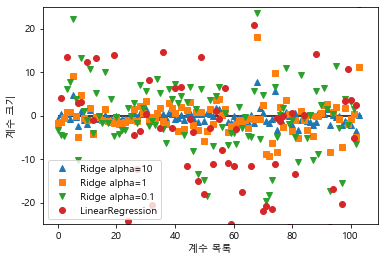

In [47]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

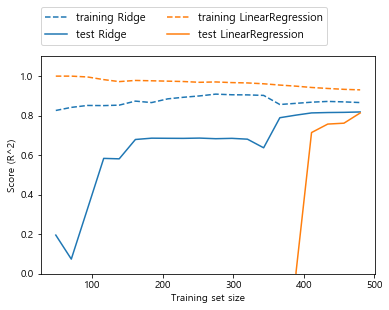

In [48]:
# 알파값을 1로 고정시킨 상태에서 데이터의 크기 조절
mglearn.plots.plot_ridge_n_samples()

In [51]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train) # alpha = 1.0

print('훈련점수 : ', lasso.score(X_train, y_train))
print('테스트 점수 : ', lasso.score(X_test, y_test))
print('사용한 특성의 수 :', np.sum(lasso.coef_ != 0))

훈련점수 :  0.26783778369518485
테스트 점수 :  0.2599232118344591
사용한 특성의 수 : 3


In [53]:
from sklearn.linear_model import Lasso

lasso001 = Lasso(alpha = 0.01).fit(X_train, y_train) # alpha = 1.0

print('훈련점수 : ', lasso001.score(X_train, y_train))
print('테스트 점수 : ', lasso001.score(X_test, y_test))
print('사용한 특성의 수 :', np.sum(lasso001.coef_ != 0))

훈련점수 :  0.8865033777946089
테스트 점수 :  0.80359225764207
사용한 특성의 수 : 34


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364149362, tolerance: 3.361037625329815
  positive)


In [55]:
from sklearn.linear_model import Lasso

lasso00001 = Lasso(alpha = 0.0001).fit(X_train, y_train) # alpha = 1.0

print('훈련점수 : ', lasso00001.score(X_train, y_train))
print('테스트 점수 : ', lasso00001.score(X_test, y_test))
print('사용한 특성의 수 :', np.sum(lasso0001.coef_ != 0))

훈련점수 :  0.9374330725382051
테스트 점수 :  0.7764741268470517
사용한 특성의 수 : 76


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471444, tolerance: 3.361037625329815
  positive)


### boston housing sample을 이용한 다중 선형 회귀

In [56]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [57]:
model_boston = LinearRegression().fit(boston.data, boston.target)

In [58]:
model_boston.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [62]:
df = pd.DataFrame(boston.data, columns = [boston.feature_names])
df['MEDV'] = boston.target
df.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


C:\Users\acorn\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


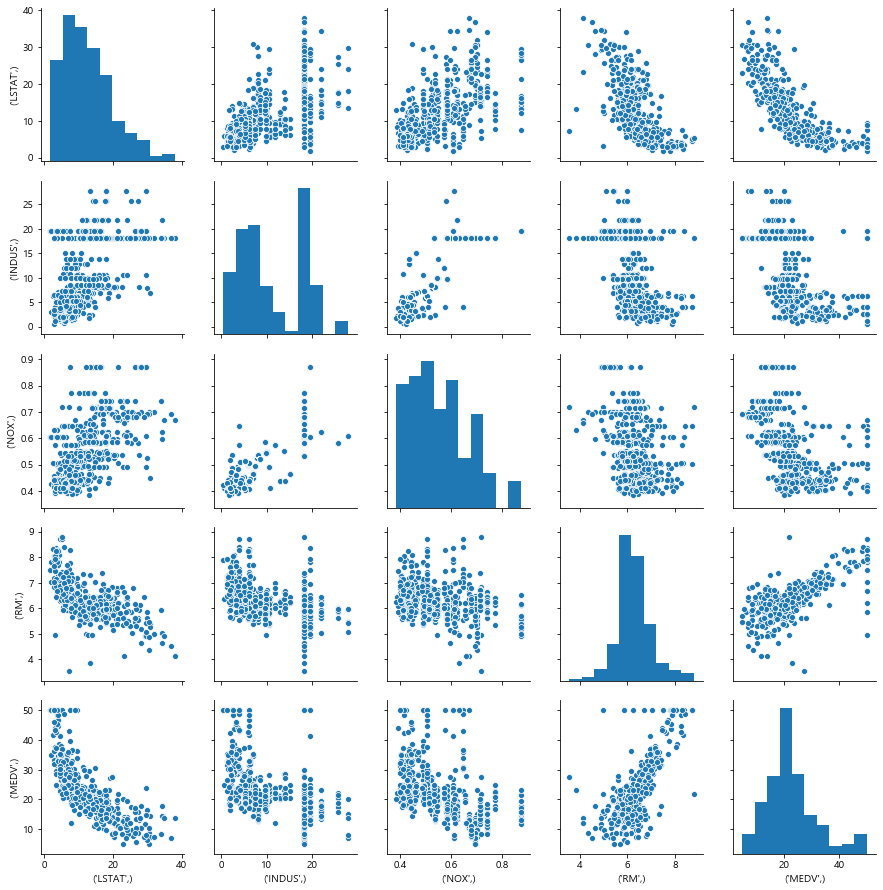

In [64]:
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols], size = 2.5)

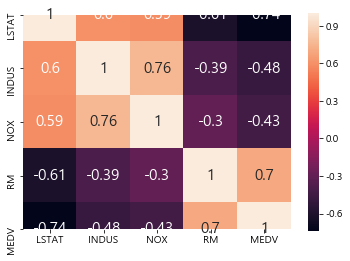

In [70]:
cc = np.corrcoef(df[cols].values.T)
cc
sns.heatmap(cc, yticklabels=cols, xticklabels = cols, annot = True, square=True, annot_kws = {'size' : 15})

In [74]:
# 방이 10개일 때 집값은 얼마인가.
X = df[['RM']].values
y = df[['MEDV']].values

lr = LinearRegression().fit(X,y)

In [75]:
house_price = lr.predict(np.array([[10]]))
print(house_price*1000)

[[56350.46903536]]


# 분류형 모델

### 로지스틱 회귀 모델
    - 시그모이드
    - 소프트 맥스
### SVM에서 제공하는 선형모델

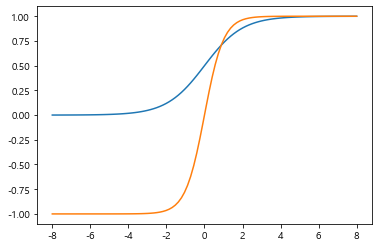

In [82]:
# 시그모이드 함수
def sigmoid(x):
    result = []
    for i in x:
        result.append(1/(1+np.exp(-i)))
    return result

x = np.linspace(-8,8,100)
sig = sigmoid(x)
plt.plot(x,sig)
plt.plot(x, np.tanh(x))

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


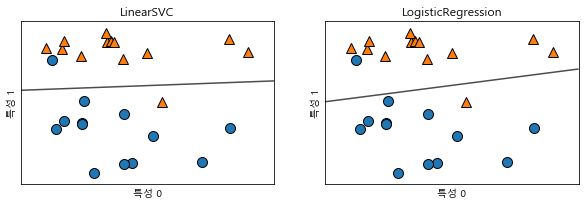

In [11]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

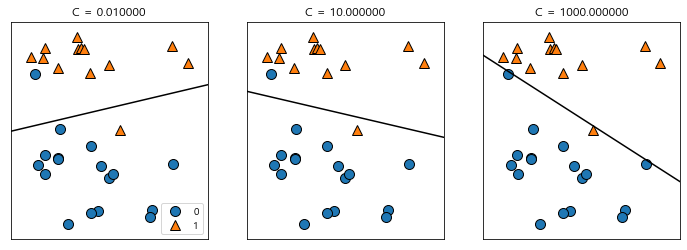

In [85]:
mglearn.plots.plot_linear_svc_regularization()

In [87]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# 데스트데이터와 훈련데이터 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42, stratify = cancer.target)


In [95]:
logreg = LogisticRegression().fit(X_train, y_train) # defult : c=1. penalty = 'l2'
print('훈련점수 :', logreg.score(X_train, y_train))
print('테스트점수 :', logreg.score(X_test, y_test))

훈련점수 : 0.9553990610328639
테스트점수 : 0.958041958041958


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [96]:
logreg100 = LogisticRegression(C = 100, penalty = 'l2').fit(X_train, y_train) # defult : c=1. penalty = 'l2'
print('훈련점수 :', logreg100.score(X_train, y_train))
print('테스트점수 :', logreg100.score(X_test, y_test))

훈련점수 : 0.971830985915493
테스트점수 : 0.965034965034965


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [97]:
logreg001 = LogisticRegression(C = 0.01, penalty = 'l2').fit(X_train, y_train) # defult : c=1. penalty = 'l2'
print('훈련점수 :', logreg001.score(X_train, y_train))
print('테스트점수 :', logreg001.score(X_test, y_test))

훈련점수 : 0.9342723004694836
테스트점수 : 0.9300699300699301


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:
logreg1 = LogisticRegression(C = 1, penalty = 'l1').fit(X_train, y_train) # defult : c=1. penalty = 'l2'
print('훈련점수 :', logreg1.score(X_train, y_train))
print('테스트점수 :', logreg1.score(X_test, y_test))

훈련점수 : 0.960093896713615
테스트점수 : 0.958041958041958


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [99]:
logreg1001 = LogisticRegression(C = 100, penalty = 'l1').fit(X_train, y_train) # defult : c=1. penalty = 'l2'
print('훈련점수 :', logreg1001.score(X_train, y_train))
print('테스트점수 :', logreg1001.score(X_test, y_test))

훈련점수 : 0.9859154929577465
테스트점수 : 0.9790209790209791


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [100]:
logreg1001 = LogisticRegression(C = 0.01, penalty = 'l1').fit(X_train, y_train) # defult : c=1. penalty = 'l2'
print('훈련점수 :', logreg1001.score(X_train, y_train))
print('테스트점수 :', logreg1001.score(X_test, y_test))

훈련점수 : 0.9178403755868545
테스트점수 : 0.9300699300699301


C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 다중 클래스 분류

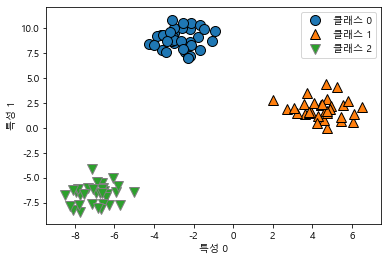

In [101]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [102]:
linear_svm = LinearSVC().fit(X,y)
print(linear_svm.coef_)

[[-0.17492621  0.23139801]
 [ 0.47621319 -0.06936736]
 [-0.18914265 -0.20399631]]


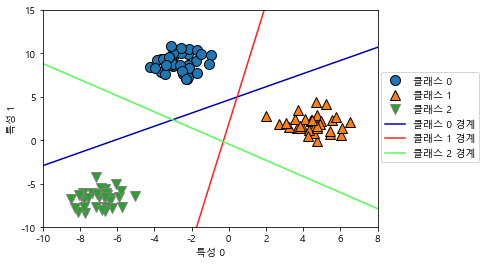

In [103]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))

## 적합도 검정
    1) Accuracy(정확도)
        - 이진분류이고 1과 0의 비율이 같을 때 
    2) Precision(정밀도)
        - 실제 Negative인 데이터 예측을  Positive로 잘 못 판단하게 되면 업무상 큰 영향이 발생하는 경우
        - FP를 낮추는데 초점을 맞춘 방식
    3) Recall(민감도)
        - 실제 Positive인 데이터 예측을 Negative로 잘못판단하게 되면 업무상 큰 영향이 발생하는 겨우
        - FN을 낮추는데 초점을 맞춘 방법
    4) F1 Score
        - 한번에 Precision 과 Recall을 확인해줌

In [3]:
# 오차표

array = [[9,1,0,0],
        [1,15,3,1],
        [5,0,24,1],
        [0,4 ,1,15]]
df_cm = pd.DataFrame(array, index = [i for i in 'ABCD'], columns = [i for i in 'ABCD'])
df_cm
#sns.heatmap(df_cm, annot = True)

,A,B,C,D
A,9,1,0,0
B,1,15,3,1
C,5,0,24,1
D,0,4,1,15


In [109]:
total = np.sum(array, axis = 1)
array = array/total[:, None]
array

array([[0.9       , 0.1       , 0.        , 0.        ],
       [0.05      , 0.75      , 0.15      , 0.05      ],
       [0.16666667, 0.        , 0.8       , 0.03333333],
       [0.        , 0.2       , 0.05      , 0.75      ]])

In [110]:
df_cm = pd.DataFrame(array, index = [i for i in 'ABCD'], columns = [i for i in 'ABCD'])
df_cm
#sns.heatmap(df_cm, annot = True)

,A,B,C,D
A,0.900000,0.10,0.00,0.000000
B,0.050000,0.75,0.15,0.050000
C,0.166667,0.00,0.80,0.033333
D,0.000000,0.20,0.05,0.750000


In [15]:
# matrix 모듈을 사용한 오차표 생성
from sklearn.metrics import confusion_matrix

y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [115]:
y_true = [1,0,1,1,0,1]
y_pred = [0,0,1,1,0,1]

confusion_matrix(y_true, y_pred , labels = [1,0])

array([[3, 1],
       [0, 2]], dtype=int64)

In [5]:
# 결과만 반환
from sklearn.metrics import classification_report
y_true = [0,0,0,1,1,0,0]
y_pred = [0,0,0,0,1,1,1]
print(classification_report(y_true, y_pred, target_names = ['class 0','class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [24]:
# ROC 그래프
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 0)

In [25]:
madel = LogisticRegression().fit(X,y)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
y_hat = model.predict(X)

In [27]:
print(y_hat[:40])
print(y[:40])

[0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1
 0 0 1]
[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]


In [28]:
confusion_matrix(y,y_hat)

array([[494,   3],
       [106, 397]], dtype=int64)

In [29]:
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       497
           1       0.99      0.79      0.88       503

    accuracy                           0.89      1000
   macro avg       0.91      0.89      0.89      1000
weighted avg       0.91      0.89      0.89      1000



Text(0, 0.5, 'True positive Rate(Recall)')

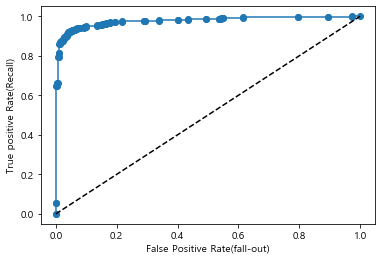

In [35]:
from sklearn.metrics import roc_curve
# 변화되는 기준값과,그 기준값을 사용했을 때의 재현율, 위양성률
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

plt.plot(fpr, tpr, 'o-', label = 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate(fall-out)')
plt.ylabel('True positive Rate(Recall)')

### 사례 1 : 타이타닉
    - 성능을 제대로 측정했는지에 대한 관점

In [36]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
cols_to_keep = ['Survived', 'Age','Fare']

In [39]:
#  단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 
#다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식
# 자동적으로 one-hot 인코딩 값을 만들어준다.
dummy_class = pd.get_dummies(df['Pclass'], prefix = 'Pclass')

In [40]:
dummy_sex = pd.get_dummies(df['Sex'], prefix = 'Sex')
dummy_sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [41]:
df1 = df[cols_to_keep].join(dummy_class.loc[:, 'Pclass1':])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,0
4,0,35.0,8.0500,0,0,1


In [47]:
df1 = df1.join(dummy_sex.loc[:,'Sex_female'])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female
0,0,22.0,7.2500,0,0,1,0
1,1,38.0,71.2833,1,0,0,1
2,1,26.0,7.9250,0,0,1,1
3,1,35.0,53.1000,1,0,0,1
4,0,35.0,8.0500,0,0,1,0


In [49]:
train_cols = df1.columns[1:]
train_cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female'], dtype='object')

In [50]:
df1[train_cols]

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female
0,22.0,7.2500,0,0,1,0
1,38.0,71.2833,1,0,0,1
2,26.0,7.9250,0,0,1,1
3,35.0,53.1000,1,0,0,1
4,35.0,8.0500,0,0,1,0
...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,0
887,19.0,30.0000,1,0,0,1
888,NaN,23.4500,0,0,1,1
889,26.0,30.0000,1,0,0,0


In [51]:
np.isnan(df1[train_cols])

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,True,False,False,False,False,False
889,False,False,False,False,False,False


In [53]:
# 결측치 삭제
#df1[train_cols] = df1[train_cols].dropna(axis = 0)
#df1['Servived'] = df1['Servived'].dropna(axis = 0)

#0으로대체
df1[train_cols] = df1[train_cols].fillna(0)
df1['Survived'] = df1['Survived'].fillna(0)

In [58]:
import statsmodels.api as sm

model = sm.Logit(df1['Survived'], df1[train_cols]).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2020-06-24 10:48 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
Pclass_1      0.0781    0.2928    0.2667  0.7897  -0.4957   0.6519
Pclass_2     -0.7632    0.2437   -3.1316  0.0017  -1.2408  -0.2855
Pclass_3     -1.9936    0.1814  -10.9909  0.0000  -2.3491  -1.6381
Sex_female    2.6151    0.1860   14.0594  0.0000   2.2505   2.9797
=================================================================

"""

In [64]:
# 머씬러닝
model2 = LogisticRegression().fit(df1[train_cols], df1['Survived'])
df1['predict'] = model2.predict(df1[train_cols])
df1.head(20)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,predict
0,0,22.0,7.2500,0,0,1,0,0
1,1,38.0,71.2833,1,0,0,1,1
2,1,26.0,7.9250,0,0,1,1,1
3,1,35.0,53.1000,1,0,0,1,1
4,0,35.0,8.0500,0,0,1,0,0
5,0,0.0,8.4583,0,0,1,0,0
6,0,54.0,51.8625,1,0,0,0,0
7,0,2.0,21.0750,0,0,1,0,0
8,1,27.0,11.1333,0,0,1,1,1
9,1,14.0,30.0708,0,1,0,1,1


In [67]:
# 오차표 그리기
confusion_matrix(df1['Survived'], df1['predict'])
print('정확도 :', model2.score(df1[train_cols], df1['Survived']))
print('정확도 :', (242+458)/(458+91+100+242))

정확도 : 0.7845117845117845
정확도 : 0.7856341189674523


In [69]:
print(classification_report(df1["Survived"], df1['predict']))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       549
           1       0.72      0.71      0.72       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



Text(0, 0.5, 'True positive Rate(Recall)')

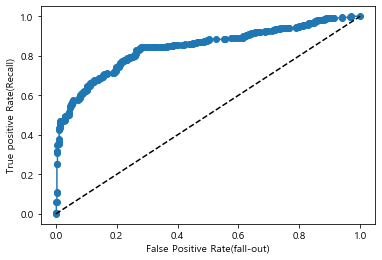

In [74]:
# ROC 커브
fpr, tpr, thresholds = roc_curve(df1["Survived"],model2.decision_function(df1[train_cols]))

plt.plot(fpr, tpr, 'o-', label = 'Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate(fall-out)')
plt.ylabel('True positive Rate(Recall)')

### 사례 2 : Cancer
    - 더 좋은 성능을 내기 위한 방법(하이퍼 파라미터 튜닝)에 대한 관점

In [76]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [77]:
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [78]:
data['class'] = pd.Series(cancer.target, dtype = 'category')
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [79]:
# 정답 데이터와 나머지 데이터 나누기
X = data.loc[:,'mean radius': 'worst fractal dimension']
y = data['class']

In [81]:
# 훈련데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


In [82]:
log_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          6.05e-153
Time:                        11:36:23   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\acorn\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [84]:
from sklearn import metrics
y_pred = log_reg.predict(X_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.958041958041958


In [86]:
cnt = metrics.confusion_matrix(y_test, y_pred)
cnt

array([[52,  1],
       [ 5, 85]], dtype=int64)

In [88]:
# 정확도 높이기
# 가장 의미 있는 변수들만 추출(p value 가 0.05 보다 작은 feature 들만 선별)
X = data[['mean compactness', 'smoothness error', 'concavity error', 'worst radius', 'worst area']]
y = data['class']

In [89]:
# 훈련데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

print(X_train.shape, X_test.shape)

(426, 5) (143, 5)


In [91]:
log_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     239.8
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          6.37e-137
Time:                        11:51:42   Log-Likelihood:                -69.240
No. Observations:                 569   AIC:                             150.5
Df Residuals:                     563   BIC:                             176.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9459      0.145  

C:\Users\acorn\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [93]:
y_pred = log_reg.predict(X_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.9230769230769231


In [98]:
cnt = metrics.confusion_matrix(y_test, y_pred)
cnt

array([[48,  5],
       [ 6, 84]], dtype=int64)

In [99]:
# p value가 0.05 보다 큰 feature 선별
# 가장 관계 없는 변수들
X = data[["mean texture", "mean smoothness", "mean fractal dimension","mean symmetry", "texture error"]]
y = data['class']

In [100]:
# 훈련데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

print(X_train.shape, X_test.shape)

(426, 5) (143, 5)


In [101]:
log_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [102]:
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     84.55
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           3.39e-66
Time:                        11:57:32   Log-Likelihood:                -234.52
No. Observations:                 569   AIC:                             481.0
Df Residuals:                     563   BIC:                             507.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

C:\Users\acorn\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [103]:
y_pred = log_reg.predict(X_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.7202797202797203


In [104]:
cnt = metrics.confusion_matrix(y_test, y_pred)
cnt

array([[24, 29],
       [11, 79]], dtype=int64)